In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

### An ordinary least square example

In [2]:
# fix the random seed

np.random.seed(42)

# Prepare for the data
# Simulate the data set based on the following model:
# In this example, y = 1.0 x1 + 3*x5+2.7*x10 + e
mu, sigma = 0, 0.5 # mean and standard deviation
N = 1200 # N: number of samples
d = 800 # d: the input dim
X = np.random.normal(mu, sigma, [N, d])
eps = np.random.normal(0, 0.5, [N, 1])
beta = np.zeros([d, 1], float)
beta[np.array([1, 5, 10]),0]  =  [1.0, 3.0, 2.7]
Y = np.dot(X, beta) + eps
Y_actual = np.dot(X, beta)
print(X)

[[ 0.24835708 -0.06913215  0.32384427 ...  0.34075035  0.01415919
   0.01487807]
 [ 0.4691419  -0.25802236  0.04806039 ...  1.02874773  0.01039685
  -0.36400147]
 [-0.09144822  0.68743821 -0.32298209 ... -0.50197869  0.10363366
   0.03467217]
 ...
 [ 0.04569438  0.37424552 -0.12820743 ... -0.37911303  0.66784089
  -0.52472939]
 [ 0.94704328  0.2116135   0.26461996 ...  0.28290149  0.16413502
   0.31588123]
 [-0.53970295 -0.05359158 -0.02710263 ... -0.05588972  0.60152995
   0.20259801]]


In [3]:
# Split the dataset into the training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

Y_actual_train = np.dot( X_train, beta) 
Y_actual_test =  np.dot(X_test, beta)

(960, 1)
r^2 on test data : 0.656088
rmse on test data : 1.261403


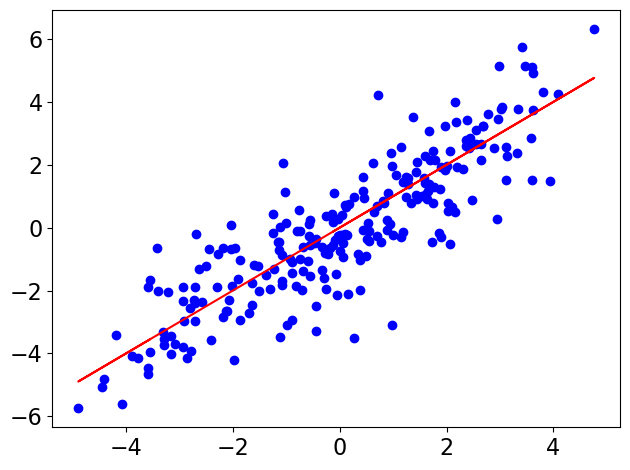

In [4]:
from sklearn.metrics import r2_score, mean_squared_error
# Select a linear model
from sklearn import linear_model
model = sklearn.linear_model.LinearRegression()

# Train the linear model
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred, color='b')
plt.plot(Y_actual_test, Y_actual_test, color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.savefig('SparseLinearModelLS.png')
print(np.shape(Y_train))
print("r^2 on test data : %f" % r2_score(Y_test, Y_test_pred))
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

### Lasso regularisation

e:\Apps\Anaconda3\envs\ml-course\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r^2 on test data : 0.946101
rmse on test data : 0.499367


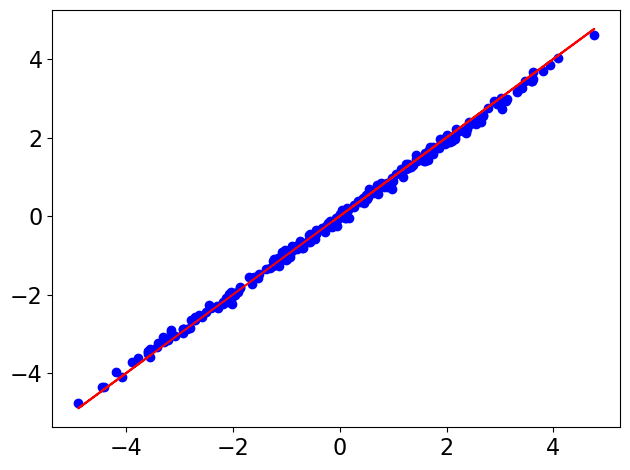

In [5]:
from sklearn.linear_model import Lasso, LassoCV

lassocv = LassoCV(cv=20).fit(X_train, Y_train)
Y_test_pred_Lasso = lassocv.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred_Lasso, color='b')
plt.plot(Y_actual_test, Y_actual_test, color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
# plt.savefig('SparseLinearModelLasso.png')
r2_score_lasso = r2_score(Y_test, Y_test_pred_Lasso)

print("r^2 on test data : %f" % r2_score_lasso)
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Lasso)))


0.015597830979571955
(800,)
(array([  1,   5,  10,  31,  43,  68, 114, 131, 134, 156, 164, 185, 209,
       226, 243, 258, 263, 265, 276, 302, 336, 356, 368, 395, 396, 426,
       434, 440, 452, 453, 457, 481, 519, 560, 585, 596, 627, 646, 655,
       663, 770, 792], dtype=int64),)


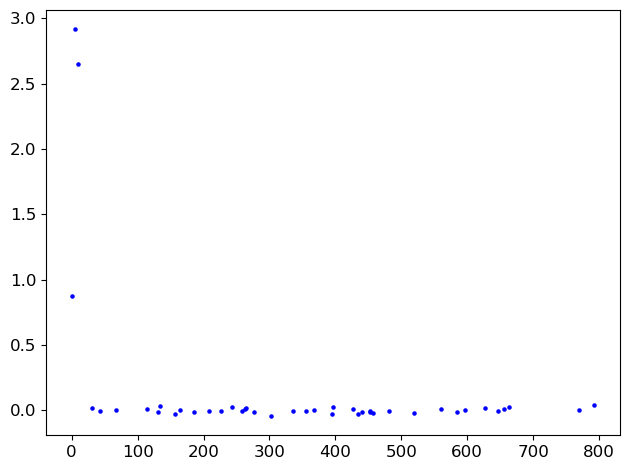

In [6]:
## Print the fitting results
print(lassocv.alpha_)
coef = lassocv.coef_
print(np.shape(coef))
non_zero_coef_index = np.where(np.abs(coef)> 0)
print(non_zero_coef_index)
plt.scatter(non_zero_coef_index, coef[non_zero_coef_index], color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


### Ridge regularisation

r^2 on test data : 0.819723
rmse on test data : 0.913273


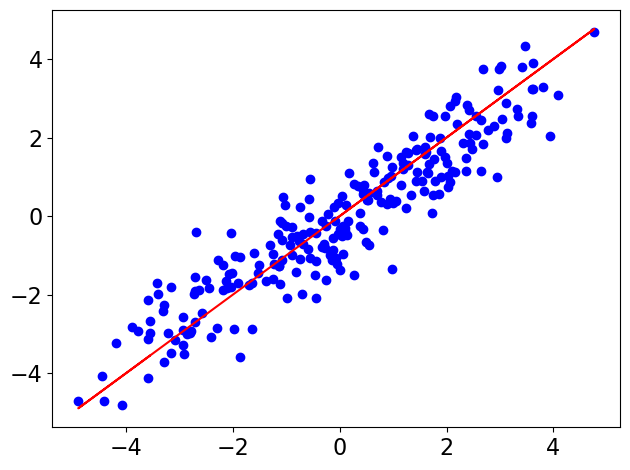

In [7]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV().fit(X_train, Y_train)

Y_test_pred_Ridge = ridgecv.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred_Ridge, color='b')
plt.plot(Y_actual_test, Y_actual_test, color ='r')
r2_score_lasso = r2_score(Y_test, Y_test_pred_Ridge)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
print("r^2 on test data : %f" % r2_score_lasso)
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Ridge)))

10.0
(1, 800)


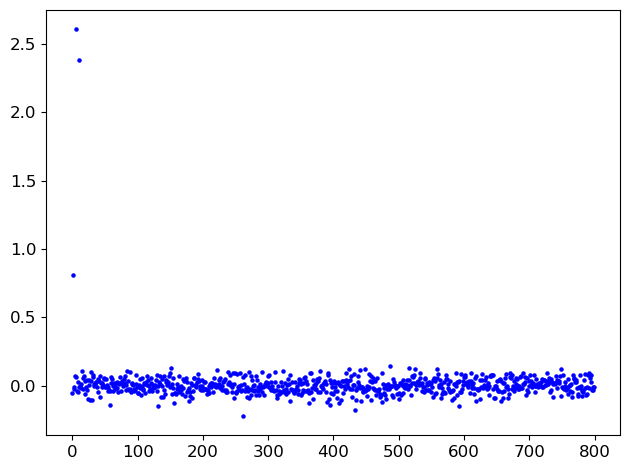

In [8]:
print(ridgecv.alpha_)
coef = ridgecv.coef_
print(np.shape(coef)) 
plt.scatter(np.arange(np.shape(coef)[1]), coef.T, color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

### Classification with MNIST example

In [9]:
!pip install --upgrade pip
!pip install tensorflow

In [10]:
import numpy as np
from keras.datasets import mnist 

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
[n_samples_train, width, height] = np.shape(x_train)
[n_samples_test, width, height] = np.shape(x_test)

X_train = x_train.reshape([n_samples_train, width*height])
X_test =x_test.reshape([n_samples_test, width*height])
Y_train = (y_train==8)
Y_test= (y_test==8)

False    54149
True      5851
dtype: int64


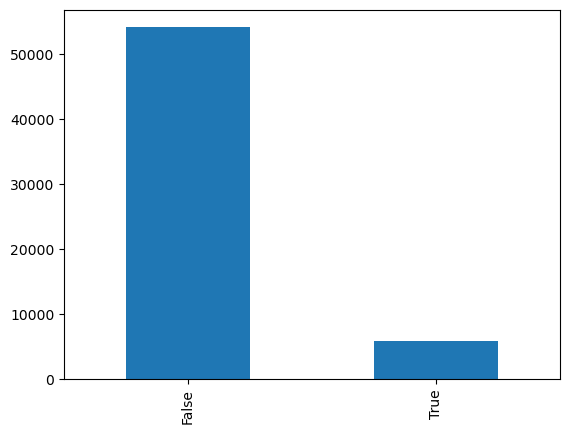

In [11]:
import pandas as pd

y_pd = pd.Series(Y_train)
count_y = y_pd.value_counts().sort_index()
count_y.plot(kind='bar');
print(count_y)

False    9026
True      974
dtype: int64


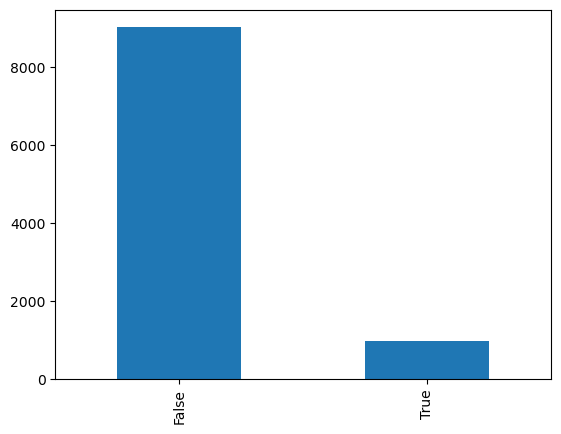

In [12]:
y_test_pd = pd.Series(Y_test)
count_y_test = y_test_pd.value_counts().sort_index()
count_y_test.plot(kind='bar');
print(count_y_test)

### Implement a logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs')
clf = model.fit(X_train, Y_train)

# Predict labels
y_train_est = clf.predict(X_train)
y_train_prob_est = clf.predict_proba(X_train)

# Predict probabilities
y_test_est = clf.predict(X_test)
y_test_prob_est = clf.predict_proba(X_test)

e:\Apps\Anaconda3\envs\ml-course\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
temp = pd.DataFrame(y_train_prob_est)
temp.columns = ['class 1 (non 8)', 'class 2 (digit 8)']
print('conditional probability estimator')
temp.head(15)

conditional probability estimator


,class 1 (non 8),class 2 (digit 8)
0,0.999929,0.000071
1,0.999097,0.000903
2,0.999970,0.000030
3,0.877992,0.122008
4,0.999048,0.000952
5,0.982516,0.017484
6,0.993879,0.006121
7,0.918154,0.081846
8,0.962653,0.037347
9,0.993037,0.006963


In [15]:
temp = pd.Series(y_test_prob_est[1])
temp.head()

0    0.999991
1    0.000009
dtype: float64

In [16]:
temp1 = pd.DataFrame(y_train_est)
temp1.columns = ['class 1 (non 8)']	
print('estimated output')
temp1.head(15)

estimated output


,class 1 (non 8)
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


### Output a confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix

# Y_test is a binary vector of the actual class label with dim (N, 1) where N is the number of samples;
# y_test_est is a binary vector of the estimated class label with dim (N, 1).
cm = confusion_matrix(Y_test, y_test_est)
print('confusion matrix is {}'.format(cm))

confusion matrix is [[8809  217]
 [ 319  655]]


### **Compute Accuracy, Precision and Recall**

In [18]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(Y_train, y_train_est)
acc_test = accuracy_score(Y_test, y_test_est)
print('accuracy of the train set= {}'.format(acc_train))
print('accuracy of the testing set= {}'.format(acc_test))

accuracy of the train set= 0.95065
accuracy of the testing set= 0.9464


In [19]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_test, y_test_est)
recall = recall_score(Y_test, y_test_est)
print(precision)
print(recall)

0.7511467889908257
0.6724845995893224


### **Plot PR Curve**

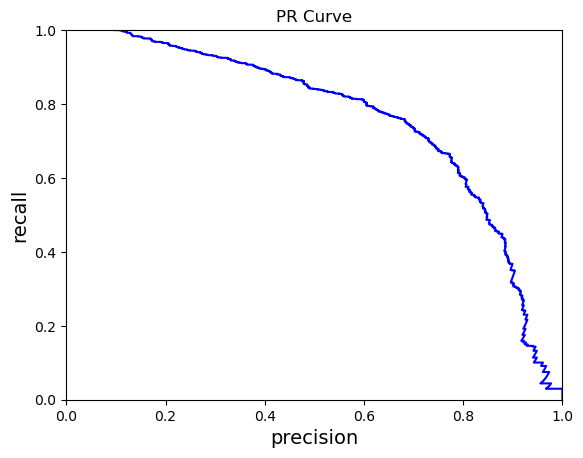

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_test, y_test_prob_est[:,1])
plt.plot(precisions, recalls, 'b')
plt.xlabel('precision', fontsize=14)
plt.ylabel('recall', fontsize=14)
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])
plt.savefig('binary_classfication_PR_curve.png')

### **Plot ROC Curve**

roc auc score = 0.9423436105869833


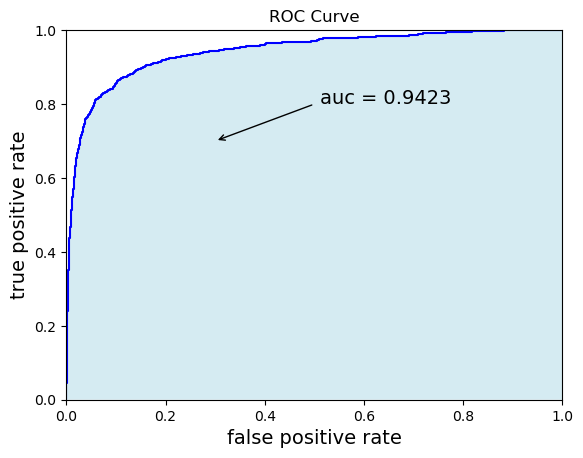

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

fps, tps, thresholds = roc_curve(Y_test, y_test_prob_est[:,1])
roc_auc_score_train = roc_auc_score(Y_test, y_test_prob_est[:,1])

print('roc auc score = {}'.format(roc_auc_score_train))

plt.plot(fps, tps, 'b')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])
plt.fill_between(fps, 0, tps, facecolor='lightblue', alpha=0.5)
plt.text( 0.5, 0.8, ' auc = '+str(round(roc_auc_score_train, 4)), fontsize=14)
plt.annotate("", xy=(0.3, 0.7), xycoords='data', xytext=(0.5, 0.8), textcoords='data', 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), )
plt.savefig('binary_classification_ROC_curve.png')